In [2]:
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

from zipfile import ZipFile
from urllib.request import urlretrieve

In [3]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [4]:
URL = r"https://www.dropbox.com/s/rys6f1vprily2bg/opencv_bootcamp_assets_NB2.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB2.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

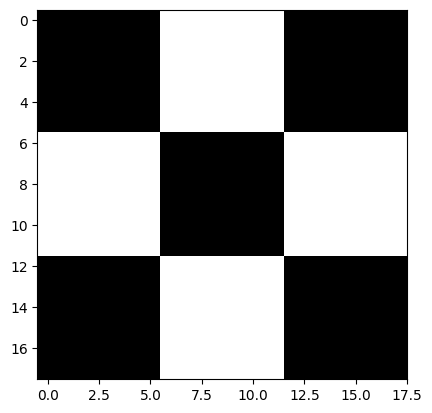

In [5]:
cb_img = cv2.imread('checkerboard_18x18.png', 0)

plt.imshow(cb_img, cmap='gray')
print(cb_img)

### Accessing individual pixels

In [6]:
#print the first pixel of the first black box
print(cb_img[0,0])
#print the first white pixel to the right of the first black box
print(cb_img[0,6])

0
255


### Modifying Image Pixels

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

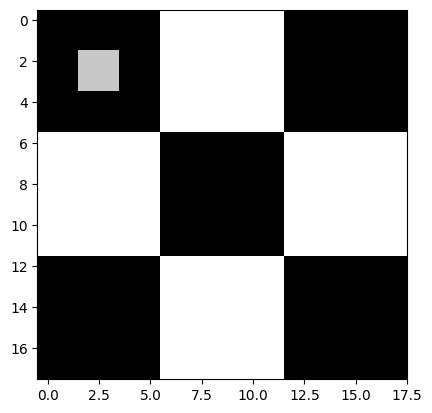

In [7]:
cb_img_copy = cb_img.copy()
cb_img_copy[2,2] = 200
cb_img_copy[2,3] = 200
cb_img_copy[3,2] = 200
cb_img_copy[3,3] = 200

#cb_img_copy[2:3, 2:3] = 200

plt.imshow(cb_img_copy,cmap='gray')
print(cb_img_copy)

### Cropping Images

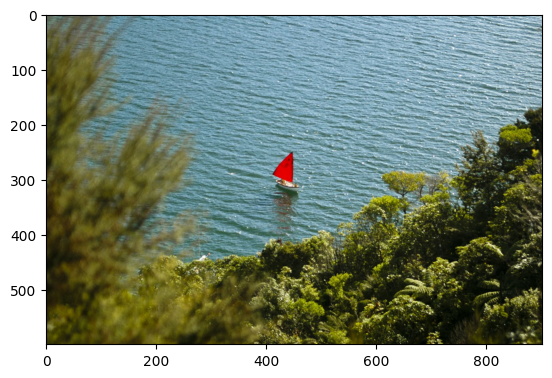

In [8]:
img_NZ_bgr = cv2.imread('New_Zealand_Boat.jpg', cv2.IMREAD_COLOR)
img_NZ_rgb = img_NZ_bgr[:,:,::-1]
plt.imshow(img_NZ_rgb)

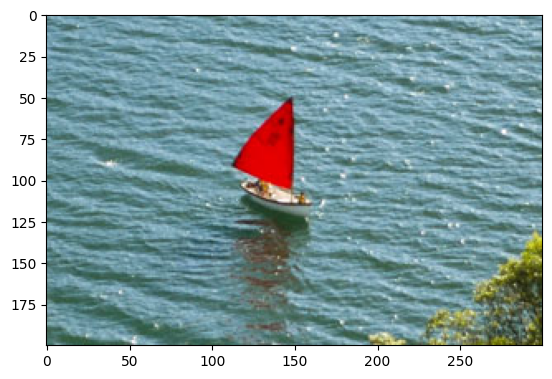

In [9]:
cropped_region = img_NZ_rgb[200:400, 300:600]
plt.imshow(cropped_region)

### Resizing Images

dst = resize(src, dsize, fx, fy)

src = input image

dsize = output image size

fx = scale factor along the horizontal axis

fy = scale factor along the vertical axis


### Scaling Factor using fx and fy

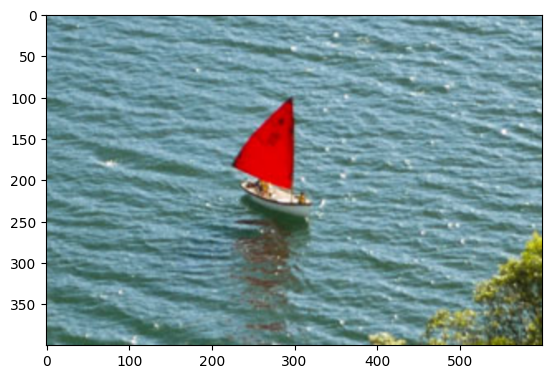

In [10]:
resized_cropped_region_2x = cv2.resize(cropped_region, None, fx=2, fy=2)
plt.imshow(resized_cropped_region_2x)

### Specifying exact size of the output image

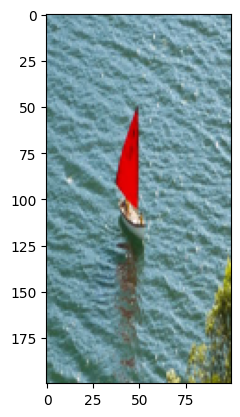

In [11]:
desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)

resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

### Resizing while maintaining aspect ratio

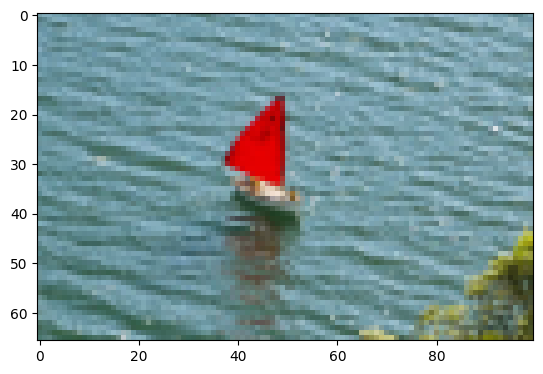

In [13]:
desired_width = 100
aspect_ratio = desired_width / cropped_region.shape[1]
desired_height = int(cropped_region.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

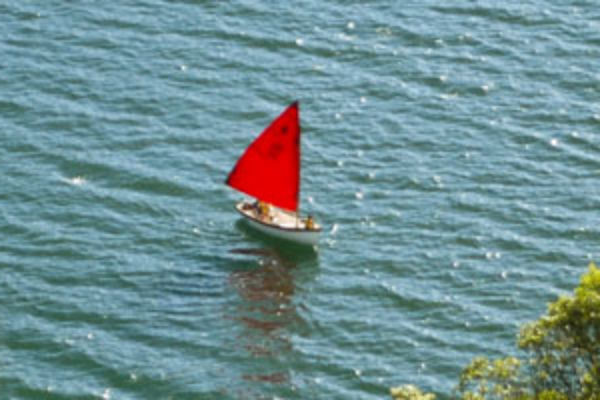

In [14]:
#swap channel order
resized_cropped_region_2x = resized_cropped_region_2x[:,:,::-1]
#save resized image to disk
cv2.imwrite('resized_cropped_region_2x.png', resized_cropped_region_2x)
#display
Image(filename='resized_cropped_region_2x.png')

### Flipping Image

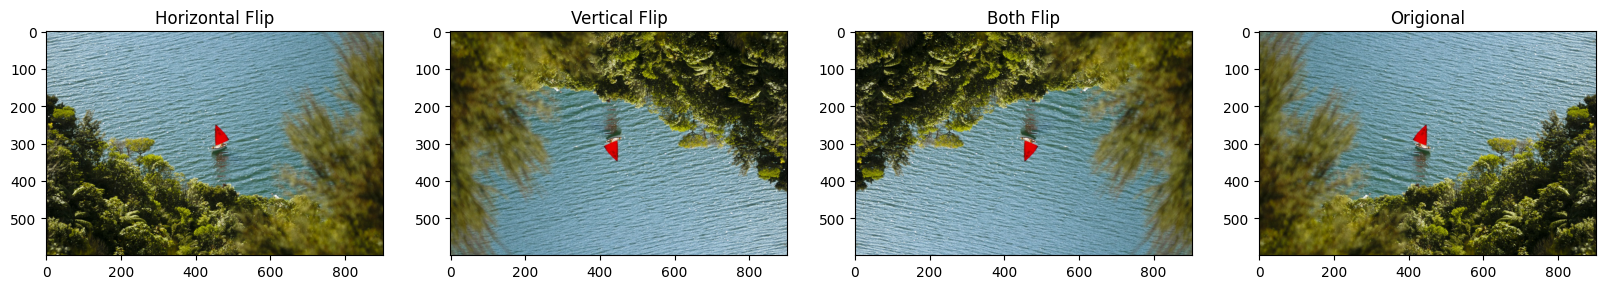

In [15]:
img_NZ_rgb_flipped_horz = cv2.flip(img_NZ_rgb, 1)
img_NZ_rgb_flipped_vert = cv2.flip(img_NZ_rgb, 0)
img_NZ_rgb_flipped_both = cv2.flip(img_NZ_rgb, -1)

plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(img_NZ_rgb_flipped_horz);plt.title('Horizontal Flip');
plt.subplot(142);plt.imshow(img_NZ_rgb_flipped_vert);plt.title('Vertical Flip');
plt.subplot(143);plt.imshow(img_NZ_rgb_flipped_both);plt.title('Both Flip');
plt.subplot(144);plt.imshow(img_NZ_rgb);plt.title('Origional');